In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from scipy.stats import skew
from scipy.stats import kurtosis
from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.metrics import mean_squared_error
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, HuberRegressor
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from IPython.display import display
import time

In [2]:
# remove columns related (dependent on) columns with many NaNs dropped in the next few cells
drop_columns = ['id', 'member_id', 'funded_amnt', 'funded_amnt_inv', 'loan_status', 'url', 'desc', 
               'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
               'recoveries',  'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d',
                 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low','policy_code', 
                'application_type', 'disbursement_method', 'debt_settlement_flag',  'debt_settlement_flag_date',
                'settlement_status',  'settlement_date', 'settlement_amount', 'settlement_percentage', 
                'settlement_term', 'sec_app_inq_last_6mths', 'orig_projected_additional_accrued_interest', 
                'payment_plan_start_date','deferral_term', 'total_rec_int', 'zip_code', 'title', 'pymnt_plan',
               'addr_state', 'emp_title']

In [3]:
print("Reading...")
start = time.time()
accepted = pd.read_csv('accepted_2007_to_2018Q4.csv', low_memory=False).drop(columns=drop_columns)
pd.set_option('display.max_columns', 999)
accepted.head()
print("Took {:.2f} seconds".format(time.time() - start))

Reading...
Took 38.93 seconds


In [4]:
"{:,} rows".format(len(accepted))

'2,260,701 rows'

In [5]:
accepted.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_rec_prncp,total_rec_late_fee,collections_12_mths_ex_med,mths_since_last_major_derog,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,hardship_amount,hardship_start_date,hardship_end_date,hardship_length,hardship_dpd,hardship_loan_status,hardship_payoff_balance_amount,hardship_last_payment_amount
0,3600.0,36 months,13.99,123.03,C,C4,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,debt_consolidation,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,3600.00,0.0,0.0,30.0,NaN,NaN,NaN,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,24700.0,36 months,11.99,820.28,C,C1,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,small_business,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,24700.00,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20000.0,60 months,10.78,432.66,B,B4,10+ years,MORTGAGE,63000.0,Not Verified,Dec-2015,home_improvement,10.78,0.0,Aug-2000,695.0,699.0,0.0,NaN,NaN,6.0,0.0,7869.0,56.2,18.0,20000.00,0.0,0.0,NaN,71000.0,13.85,Not Verified,0.0,0.0,189699.0,0.0,1.0,0.0,4.0,19.0,10827.0,73.0,0.0,2.0,2081.0,65.0,14000.0,2.0,5.0,1.0,6.0,31617.0,2737.0,55.9,0.0,0.0,125.0,184.0,14.0,14.0,5.0,101.0,NaN,10.0,NaN,0.0,2.0,3.0,2.0,4.0,6.0,4.0,7.0,3.0,6.0,0.0,0.0,0.0,0.0,100.0,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,35000.0,60 months,14.85,829.90,C,C5,10+ years,MORTGAGE,110000.0,Source Verified,Dec-2015,debt_consolidation,17.06,0.0,Sep-2008,785.0,789.0,0.0,NaN,NaN,13.0,0.0,7802.0,11.6,17.0,19102.35,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,301500.0,1.0,1.0,0.0,1.0,23.0,12609.0,70.0,1.0,1.0,6987.0,45.0,67300.0,0.0,1.0,0.0,2.0,23192.0,54962.0,12.1,0.0,0.0,36.0,87.0,2.0,2.0,1.0,2.0,NaN,NaN,NaN,0.0,4.0,5.0,8.0,10.0,2.0,10.0,13.0,5.0,13.0,0.0,0.0,0.0,1.0,100.0,0.0,0.0,0.0,381215.0,52226.0

### Missing Values

Proportion of NaNs cutoff: 50%

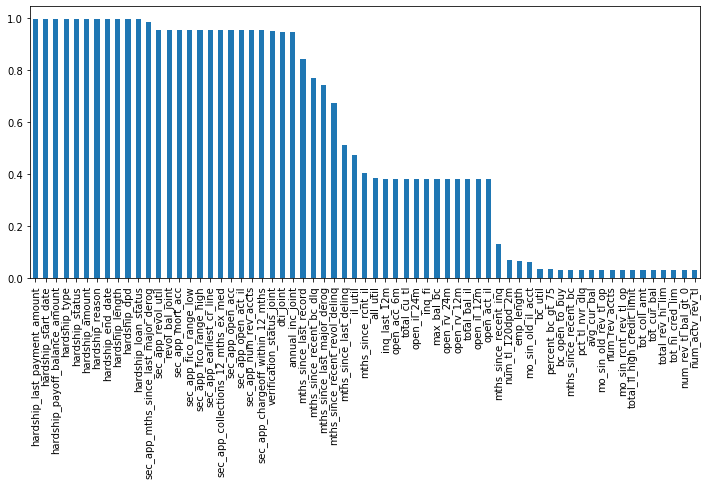

In [6]:
accepted.isna().mean().sort_values(ascending=False).head(65).plot(kind='bar', figsize=(12,5))

Majority of variables related to joint applications are NAN. Therefore, we create a dummy variable for joint application and remove all variables for joint application as most values are NAN.

In [7]:
accepted['isjoint'] = 1*(~accepted['sec_app_fico_range_high'].isna())

In [8]:
sec_columns = accepted.columns[accepted.columns.str.contains('sec_app')]
sec_columns = np.hstack((sec_columns, accepted.columns[accepted.columns.str.contains('_joint')]))
accepted.drop(columns = sec_columns, inplace=True)
sec_columns

array(['sec_app_fico_range_low', 'sec_app_fico_range_high',
       'sec_app_earliest_cr_line', 'sec_app_mort_acc', 'sec_app_open_acc',
       'sec_app_revol_util', 'sec_app_open_act_il',
       'sec_app_num_rev_accts', 'sec_app_chargeoff_within_12_mths',
       'sec_app_collections_12_mths_ex_med',
       'sec_app_mths_since_last_major_derog', 'annual_inc_joint',
       'dti_joint', 'verification_status_joint', 'revol_bal_joint'],
      dtype=object)

Similarly for hardship variables. Most applicant didn't have hardship status. We create a dummy to refelct whether a person had hardship before or not and remove the hardship related columns

In [9]:
accepted['ishardship'] = 1*(~accepted['hardship_end_date'].isna())

In [10]:
hard_columns = accepted.columns[accepted.columns.str.contains('hardship_')]
accepted.drop(columns = hard_columns, inplace=True)
hard_columns

Index(['hardship_flag', 'hardship_type', 'hardship_reason', 'hardship_status',
       'hardship_amount', 'hardship_start_date', 'hardship_end_date',
       'hardship_length', 'hardship_dpd', 'hardship_loan_status',
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount'],
      dtype='object')

The remaining columns that are majority NaN will be dropped; quick visual check tells us there are 5 of them

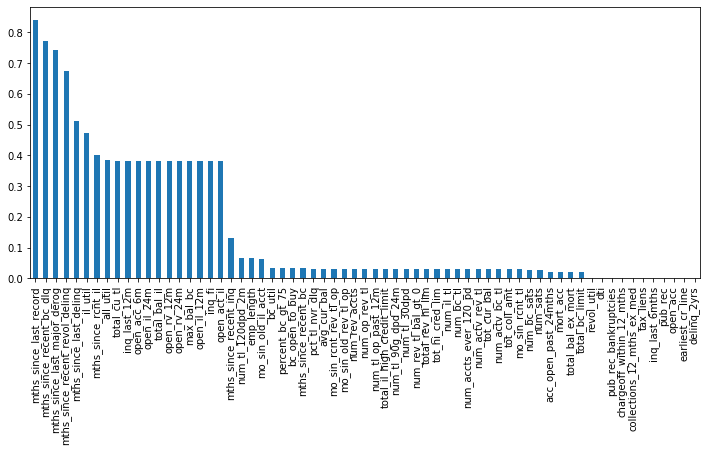

In [11]:
accepted.isna().mean().sort_values(ascending=False).head(65).plot(kind='bar', figsize=(12,5))

This code generates a useful table of missingness, called "missing_zero_values_table"

In [12]:
def missing_zero_values_table(accepted):
        zero_val = (accepted == 0.00).astype(int).sum(axis=0)
        mis_val = accepted.isnull().sum()
        mis_val_percent = 100 * accepted.isnull().sum() / len(accepted)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(accepted)
        mz_table['Data Type'] = accepted.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(accepted.shape[1]) + " columns and " + str(accepted.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
#         mz_table.to_excel('D:/sampledata/missing_and_zero_values.xlsx', freeze_panes=(1,0), index = False)
        return mz_table

missing_zero_values_table(accepted)

Your selected dataframe has 86 columns and 2260701 Rows.
There are 84 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
mths_since_last_record,1296,1901545,84.1,1902841,84.2,float64
mths_since_recent_bc_dlq,796,1741000,77.0,1741796,77.0,float64
mths_since_last_major_derog,375,1679926,74.3,1680301,74.3,float64
mths_since_recent_revol_delinq,1321,1520342,67.3,1521663,67.3,float64
mths_since_last_delinq,2637,1158535,51.2,1161172,51.4,float64
...,...,...,...,...,...,...
fico_range_high,0,33,0.0,33,0.0,float64
revol_bal,12562,33,0.0,12595,0.6,float64
total_rec_prncp,2576,33,0.0,2609,0.1,float64
total_rec_late_fee,2173513,33,0.0,2173546,96.1,float64


Dropping the remaining columns with a proportion of NaNs greater than 50%

In [13]:
accepted.drop(['mths_since_last_record','mths_since_recent_bc_dlq','mths_since_last_major_derog','mths_since_recent_revol_delinq','mths_since_last_delinq'], axis=1, inplace=True)

For the remaining variables, we replace NaN values with zero; then we check to be sure all missing values are gone.

In [14]:
accepted = accepted.fillna(0)

In [15]:
missing_zero_values_table(accepted)

Your selected dataframe has 81 columns and 2260701 Rows.
There are 0 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type


### Data Type

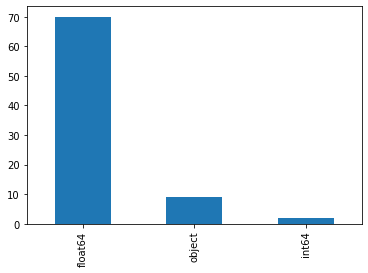

In [16]:
accepted.dtypes.value_counts().plot(kind='bar');

In [17]:
accepted.select_dtypes('object')

,term,grade,sub_grade,emp_length,home_ownership,verification_status,issue_d,purpose,earliest_cr_line
0,36 months,C,C4,10+ years,MORTGAGE,Not Verified,Dec-2015,debt_consolidation,Aug-2003
1,36 months,C,C1,10+ years,MORTGAGE,Not Verified,Dec-2015,small_business,Dec-1999
2,60 months,B,B4,10+ years,MORTGAGE,Not Verified,Dec-2015,home_improvement,Aug-2000
3,60 months,C,C5,10+ years,MORTGAGE,Source Verified,Dec-2015,debt_consolidation,Sep-2008
4,60 months,F,F1,3 years,MORTGAGE,Source Verified,Dec-2015,major_purchase,Jun-1998
...,...,...,...,...,...,...,...,...,...
2260696,60 months,B,B3,9 years,MORTGAGE,Verified,Oct-2016,debt_consolidation,Feb-1995
2260697,60 months,C,C4,6 years,RENT,Not Verified,Oct-2016,debt_consolidation,Jul-1999
2260698,60 months,C,C4,10+ years,MORTGAGE,Verified,Oct-2016,debt_consolidation,Jun-1996
2260699,0,0,0,0,0,0,0,0,0


### Data Cleaning

Convert employement length from string to numeric by extracting numbers

In [18]:
accepted['emp_length'] = accepted['emp_length'].str.extract('(\d+)')[0].fillna(0).astype(int)

Extract the year from earliest_cr_line

In [19]:
accepted['earliest_cr_line'] = accepted['earliest_cr_line'].str.extract('(\d+)')[0].fillna(2018).astype(int)

Extract the year from issue_d

In [20]:
accepted['issue_d'] = accepted['issue_d'].str.extract('(\d+)')[0].fillna(2018).astype(int)

### EDA

Correlation between target and numeric columns

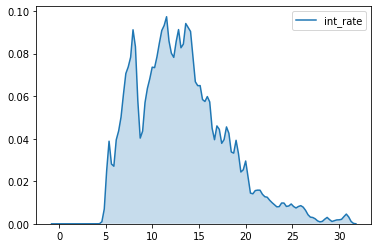

In [21]:
sns.kdeplot(accepted['int_rate'], shade=True)

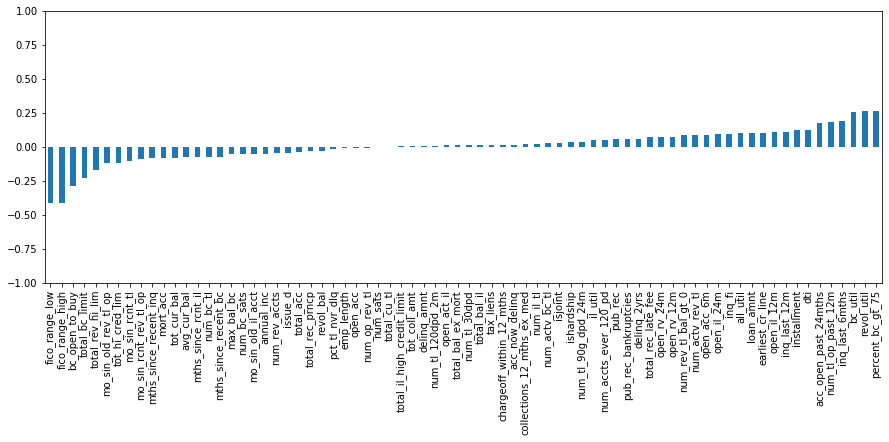

In [22]:
accepted.drop(columns=['int_rate']).corrwith(accepted['int_rate']).\
            sort_values().dropna().plot(kind='bar', figsize=(15,5))
plt.ylim([-1, 1]);

Among features, Fico scores and the number of accounts opened in past 12 months have the highest correlation with the target. Fico score has negative correlation which means that higher Fico score leads to lower interest rate. On the other hand, number of account has positive correlation which means that if a person has opened many account during the last 12 months, his interest rate would be higher

In [23]:
accepted['issue_d'].value_counts()

2018    495275
2017    443579
2016    434407
2015    421095
2014    235629
2013    134814
2012     53367
2011     21721
2010     12537
2009      5281
2008      2393
2007       603
Name: issue_d, dtype: int64

This figure shows that longer loan duration leads to higher insterest rate

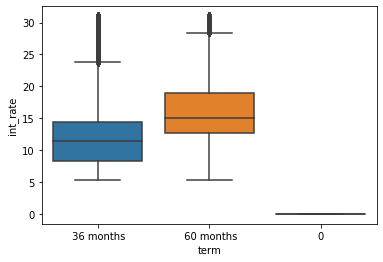

In [24]:
sns.boxplot(x='term', y='int_rate', data=accepted);

In [25]:
accepted[accepted['term'].apply(lambda x: type(x)=='O')]

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_rec_prncp,total_rec_late_fee,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,isjoint,ishardship


In [26]:
accepted.issue_d.unique()

array([2015, 2018, 2017, 2016, 2014, 2011, 2010, 2009, 2008, 2007, 2013,
       2012])

In [27]:
accepted['issue_d']

0          2015
1          2015
2          2015
3          2015
4          2015
           ... 
2260696    2016
2260697    2016
2260698    2016
2260699    2018
2260700    2018
Name: issue_d, Length: 2260701, dtype: int64

Lending club uses a model to assign borrowers a grade based on their profile. Grade A has the lowest risk for the investor and grade G has the highest. Below figure shows that the interest rate is highly correlated with borower grade

In [28]:
# Sample too large to run scatterplots
# sns.boxplot(x='grade', y='int_rate', data=accepted.sort_values('grade'));

This figure shows the correlation between loan amount and interest rate. Higher loan amounts tend to have higher interest rate

In [29]:
# Sample too large to run scatterplots
# sns.lmplot(x='loan_amnt', y='int_rate', data=accepted,height=5, aspect=2)

FICO score is impacting interest rate for the borower. Better FICO score (higher values) leads to lower interest rate

In [30]:
# Sample too large to run scatterplots
# sns.lmplot(x='fico_range_high', y='int_rate', hue='term', data=accepted,height=5, aspect=2)

In [31]:
# Sample too large to run scatterplots
# sns.lmplot(x='earliest_cr_line', y='int_rate', hue='term', data=accepted,height=5, aspect=2)

What explains this 2013 spike?

([<matplotlib.axis.XTick at 0x7f368b8e95f8>,
 <a list of 12 Text xticklabel objects>)

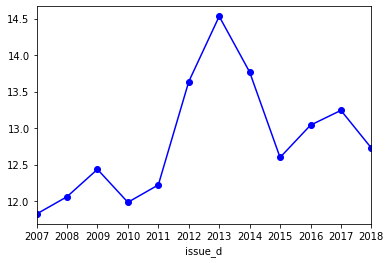

In [28]:
accepted.groupby('issue_d')['int_rate'].mean().plot(style='bo-')
plt.xticks(accepted['issue_d'].unique())

In [46]:
accepted = accepted.drop(columns=['grade', 'sub_grade'])

KeyError: "['grade' 'sub_grade'] not found in axis"

## Modeling

In [47]:
accepted_dummy = pd.get_dummies(accepted)
X_train = accepted_dummy.drop(columns='int_rate')

In [48]:
scaler = StandardScaler()
X = scaler.fit_transform(X_train)
y = accepted_dummy['int_rate'].values
print(X.shape)

(2260701, 103)


### Linear Regression Feature Selection

In [49]:
print("Reading...")
start = time.time()
lin = LinearRegression().fit(X, y)
model = SelectFromModel(lin, prefit=True)
selected = model.get_support()
X_train.columns[selected]
print("Took {:.2f} seconds".format(time.time() - start))

Reading...
Took 8.83 seconds


### Random Forest Feature Importance

Reading...
Took 4458.05 seconds


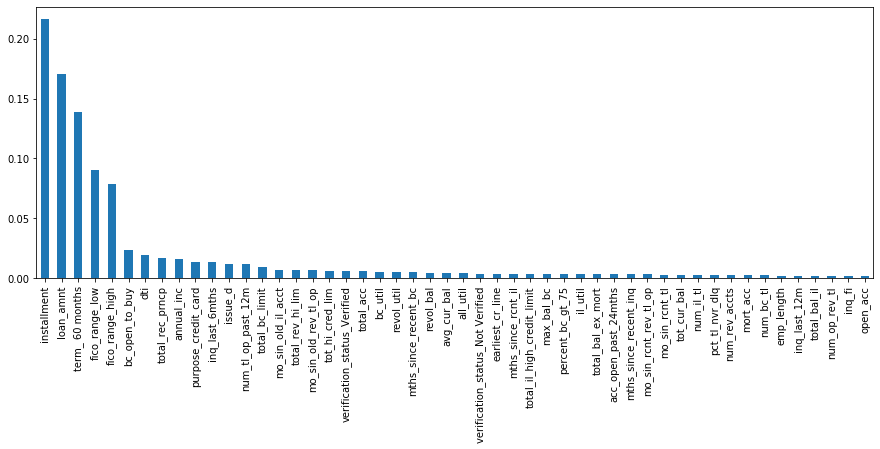

In [50]:
print("Reading...")
start = time.time()
rf = RandomForestRegressor(n_estimators=50)
rf.fit(X,y)
imp = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
imp.head(50).plot(kind='bar', figsize=(15,5));
print("Took {:.2f} seconds".format(time.time() - start))

In [51]:
print("Reading...")
start = time.time()
print('hello')
print("Took {:.2f} seconds".format(time.time() - start))

Reading...
hello
Took 0.00 seconds


### Cross Validation and Model Selection

In [ ]:
print("Reading...")
start = time.time()
kf = KFold(n_splits=5, shuffle=True, random_state=123)
print("Took {:.2f} seconds".format(time.time() - start))

In [ ]:
print("Reading...")
start = time.time()
rf = RandomForestRegressor(n_estimators=100)
rf_scores = cross_val_score(rf, X, y, cv=kf, scoring='r2')
print("Took {:.2f} seconds".format(time.time() - start))

In [ ]:
lin = LinearRegression()
lin_scores = cross_val_score(lin, X[:,selected], y, cv=kf, scoring='r2')

In [ ]:
svr = SVR(gamma='auto')
svr_scores = cross_val_score(svr, X[:,selected], y, cv=kf, scoring='r2')

In [ ]:
tree = DecisionTreeRegressor()
tree_scores = cross_val_score(tree, X, y, cv=kf, scoring='r2')

In [ ]:
res = pd.DataFrame({'rf': rf_scores, 'lin': lin_scores, 'svr': svr_scores, 'tree': tree_scores})
res

In [ ]:
sns.barplot(x="model", y="r2", data=res.melt(var_name='model', value_name='r2'));

Random sampling 1000 rows from each year

In [ ]:
# # # Checking the number of rows from issue_d == 2007
# seriesObj = accepted.apply(lambda x: True if x['issue_d'] == 2007 else False , axis=1)
# numOfRows = len(seriesObj[seriesObj == True].index)
# numOfRows

In [ ]:
# # There are only 603 rows for issue_d == 2007 hence sample(600)
# accepted2018 = accepted.loc[accepted['issue_d'] == 2018].sample(1000)
# accepted2017 = accepted.loc[accepted['issue_d'] == 2017].sample(1000)
# accepted2016 = accepted.loc[accepted['issue_d'] == 2016].sample(1000)
# accepted2015 = accepted.loc[accepted['issue_d'] == 2015].sample(1000)
# accepted2014 = accepted.loc[accepted['issue_d'] == 2014].sample(1000)
# accepted2013 = accepted.loc[accepted['issue_d'] == 2013].sample(1000)
# accepted2012 = accepted.loc[accepted['issue_d'] == 2012].sample(1000)
# accepted2011 = accepted.loc[accepted['issue_d'] == 2011].sample(1000)
# accepted2010 = accepted.loc[accepted['issue_d'] == 2010].sample(1000)
# accepted2009 = accepted.loc[accepted['issue_d'] == 2009].sample(1000)
# accepted2008 = accepted.loc[accepted['issue_d'] == 2008].sample(1000)
# accepted2007 = accepted.loc[accepted['issue_d'] == 2007].sample(600)
# accepted_sample = pd.concat([accepted2018,
#                              accepted2017,
#                              accepted2016,
#                              accepted2015,
#                              accepted2014,
#                              accepted2013,
#                              accepted2012,
#                              accepted2011,
#                              accepted2010,
#                              accepted2009,
#                              accepted2008,
#                              accepted2007], axis=0)

In [ ]:
# accepted_sample.to_csv('accepted_sample.csv')

# Data Prep for SML

In [41]:
train_features = pd.DataFrame(pd.get_dummies(accepted))

test_features = pd.DataFrame(pd.get_dummies(accepted))

labels = accepted['int_rate']
features = accepted.drop('int_rate', axis=1)

features = np.array(features)
labels = np.array(labels)

train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = .25, random_state = 42)

In [42]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (1695525, 78)
Training Labels Shape: (1695525,)
Testing Features Shape: (565176, 78)
Testing Labels Shape: (565176,)


In [43]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state = 42)

from pprint import pprint

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [44]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [45]:
rf = RandomForestRegressor(random_state = 42)
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 100, scoring ='neg_mean_absolute_error',
                              cv = 10, verbose = 2, random_state = 42, n_jobs= -1,
                              return_train_score=True)

rf_random.fit(train_features, train_labels)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


ValueError: could not convert string to float: ' 36 months'

In [ ]:
# Differentiating numerical and categorical features (minus the target)
cat_features = accepted.select_dtypes(include = ["object"]).columns
num_features = accepted.select_dtypes(exclude = ["object"]).columns
num_features = num_features.drop("int_rate")
print('Numerical features : ' + str(len(num_features)))
print('Categorical features : ' +str(len(cat_features)))
accepted_num = accepted[num_features]
accepted_cat = accepted[cat_features]

In [ ]:
# # Log transforming skewed numerical features;
# # This is inspired by Julienc, who in turn borrowed from Alexander Papiu's script "house prices advanced regression techniques"
# # Skewness of an abs value > .5 is considered here at least somewhat skewed
# skewness = accepted_num.apply(lambda x: skew(x))
# skewness = skewness[abs(skewness)]
# print(str(skewness.shape[0]) + " skewed numerical features to log transform")
# skewed_features = skewness.index
# accepted_num[skewed_features] = np.log1p(accepted_num[skewed_features])
# print('Done')


In [ ]:
# Concatenates the categoral and numericals minus the target Y
accepted_train = pd.concat([accepted_num, accepted_cat], axis=1)
print("New number of features : " + str(accepted_train.shape[1]))

In [ ]:
## Separates into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(accepted, y, test_size = 0.3, random_state = 0)
print("X_train : " + str(X_train.shape))
print("X_test : " + str(X_test.shape))
print("y_train : " + str(y_train.shape))
print("y_test : " + str(y_test.shape))

In [ ]:
stdSc = StandardScaler()
X_train.loc[:, num_features] = stdSc.fit_transform(X_train.loc[:, num_features])
X_test.loc[:, num_features] = stdSc.transform(X_test.loc[:, num_features])

In [ ]:
# Define error measure for official scoring : RMSE
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.metrics import mean_squared_error

scorer = make_scorer(mean_squared_error, greater_is_better = False)

def rmse_cv_train(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring = scorer, cv = 10))
    return(rmse)

def rmse_cv_test(model):
    rmse= np.sqrt(-cross_val_score(model, X_test, y_test, scoring = scorer, cv = 10))
    return(rmse)

In [ ]:
ridge = RidgeCV(alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60])
ridge.fit(X, y)
alpha = ridge.alpha_
print('Best alpha :', alpha)

In [ ]:
print("Try again for more precision with alphas centered around " + str(alpha))
ridge = RidgeCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, 
                          alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
                          alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4], 
                cv = 10)
ridge.fit(X, y)
alpha = ridge.alpha_
print("Best alpha :", alpha)

In [ ]:
print("Ridge RMSE on Training set :", rmse_cv_train(ridge).mean())
print("Ridge RMSE on Test set :", rmse_cv_test(ridge).mean())
y_rdg = ridge.predict(X_train)
y_rdg = ridge.predict(X_test)

In [ ]:
# Plot residuals
plt.scatter(y_train_rdg, y_train_rdg - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_rdg, y_test_rdg - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# Random Forest

In [37]:
features = pd.DataFrame(pd.get_dummies(accepted))

In [38]:
# test_features = pd.DataFrame(pd.get_dummies(dftest))

In [39]:
labels = accepted['int_rate']
features = features.drop('int_rate', axis = 1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

print("Reading...")
start = time.time()
model = RandomForestClassifier(n_estimators=20, random_state=RSEED, max_features = 'sqrt', n_jobs = -1, verbose=1)

model.fit(train, train_labels)
print("Took {:.2f} seconds".format(time.time() - start))